In [3]:
%matplotlib inline
from sklearn.datasets import make_blobs #가상데이터 생성 함수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)
# n_samples 표본데이터 수
# n_features 독립변수 수
# random_state 랜덤함수 시드

print(points.shape, points[:10])
print(labels.shape, labels[:10])

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


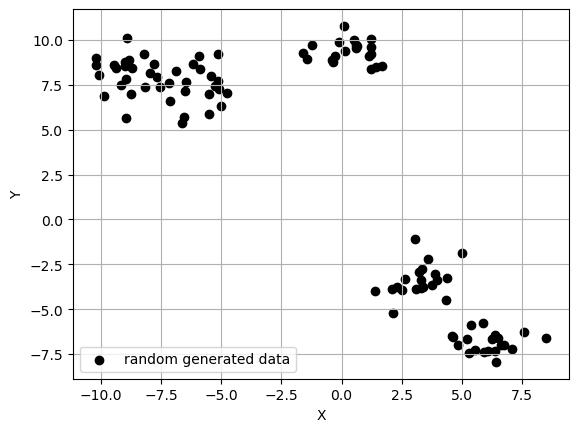

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

ax.scatter(points[:,0], points[:,1], c='black', label='random generated data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

In [6]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=5)

kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))
print(kmeans_cluster.labels_)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]
[2 0 1 4 4 3 1 1 0 2 0 0 0 3 0 0 1 0 1 1 2 0 3 3 4 0 1 3 4 0 4 3 2 4 1 0 1
 4 4 4 3 1 3 2 3 3 2 2 0 1 3 0 2 0 3 2 0 3 0 0 4 2 4 0 4 2 2 2 4 3 3 1 3 4
 1 3 3 3 1 1 2 2 3 4 4 1 2 2 1 2 2 1 1 4 4 3 1 4 2 4]


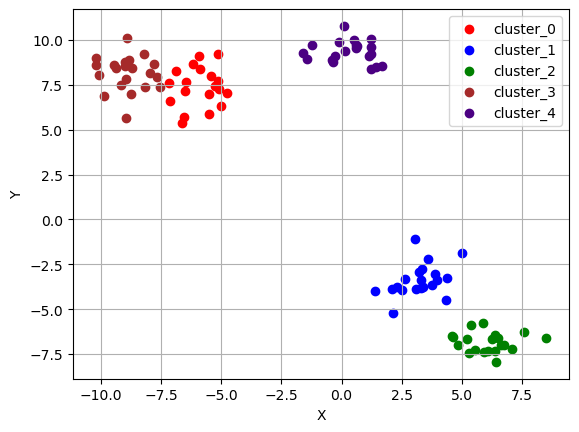

In [7]:
color_dict = {0:'red', 1:'blue',2:'green',3:'brown',4:'indigo'}

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster]
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],
               c=color_dict[cluster], label='cluster_{}'.format(cluster))
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()